In [1]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import graphviz

In [2]:
data=pd.read_csv("speeddating.csv")
data

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,b'',1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,b'',1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,b'',21.0,b'male',25.0,26.0,1.0,b'[0-1]',b'European/Caucasian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',2.0,5.0,b'[0-5]',b'[5-6]',0.0,b'0',b'1',b'0'
8374,b'',21.0,b'male',25.0,24.0,1.0,b'[0-1]',b'European/Caucasian-American',b'Other',b'0',...,b'[0-3]',b'[3-5]',4.0,4.0,b'[0-5]',b'[0-4]',0.0,b'0',b'0',b'0'
8375,b'',21.0,b'male',25.0,29.0,4.0,b'[4-6]',b'European/Caucasian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,5.0,b'[6-8]',b'[5-6]',0.0,b'0',b'0',b'0'
8376,b'',21.0,b'male',25.0,22.0,3.0,b'[2-3]',b'European/Caucasian-American',b'Asian/Pacific Islander/Asian-American',b'0',...,b'[0-3]',b'[3-5]',5.0,5.0,b'[0-5]',b'[5-6]',0.0,b'0',b'1',b'0'


In [3]:
len(data.columns)

123

#### Eliminate columns with too missing values (more than 10%)

In [4]:
#TODO Check which attributes have missing values 
nulls = data.isnull()*1
# Sum the columns
col_sums = nulls.sum()/len(data)*100

percetage_10=[]
for column in data.columns:
    if col_sums[column]>10:
        print(column, col_sums[column])
        percetage_10.append(column)
data=data.drop(columns=percetage_10)
print(percetage_10)

shared_interests_o 12.843160658868467
shared_interests_partner 12.735736452613988
expected_num_interested_in_me 78.5151587491048
expected_num_matches 14.000954881833373
['shared_interests_o', 'shared_interests_partner', 'expected_num_interested_in_me', 'expected_num_matches']


#### Print columns

In [5]:
for column in data.columns:
    print(column)

has_null
wave
gender
age
age_o
d_age
d_d_age
race
race_o
samerace
importance_same_race
importance_same_religion
d_importance_same_race
d_importance_same_religion
field
pref_o_attractive
pref_o_sincere
pref_o_intelligence
pref_o_funny
pref_o_ambitious
pref_o_shared_interests
d_pref_o_attractive
d_pref_o_sincere
d_pref_o_intelligence
d_pref_o_funny
d_pref_o_ambitious
d_pref_o_shared_interests
attractive_o
sinsere_o
intelligence_o
funny_o
ambitous_o
d_attractive_o
d_sinsere_o
d_intelligence_o
d_funny_o
d_ambitous_o
d_shared_interests_o
attractive_important
sincere_important
intellicence_important
funny_important
ambtition_important
shared_interests_important
d_attractive_important
d_sincere_important
d_intellicence_important
d_funny_important
d_ambtition_important
d_shared_interests_important
attractive
sincere
intelligence
funny
ambition
d_attractive
d_sincere
d_intelligence
d_funny
d_ambition
attractive_partner
sincere_partner
intelligence_partner
funny_partner
ambition_partner
d_attrac

#### Description columns

In [6]:
"""
Variable	Description
gender	Gender of self
age	Age of self
age_o	Age of partner
d_age	Difference in age
d_age	Difference in age
race	Race of self
race_o	Race of partner
samerace	Whether the two persons have the same race or not.
importance_same_race	How important is it that partner is of same race?
importance_same_religion	How important is it that partner has same religion?
field	Field of study
pref_o_attractive	How important does partner rate attractiveness
pref_o_sinsere	How important does partner rate sincerity
pref_o_intelligence	How important does partner rate intelligence
pref_o_funny	How important does partner rate being funny
pref_o_ambitious	How important does partner rate ambition
pref_o_shared_interests	How important does partner rate having shared interests
attractive_o	Rating by partner (about me) at night of event on attractiveness
sincere_o	Rating by partner (about me) at night of event on sincerity
intelligence_o	Rating by partner (about me) at night of event on intelligence
funny_o	Rating by partner (about me) at night of event on being funny
ambitous_o	Rating by partner (about me) at night of event on being ambitious
shared_interests_o	Rating by partner (about me) at night of event on shared interest
attractive_important	What do you look for in a partner - attractiveness
sincere_important	What do you look for in a partner - sincerity
intellicence_important	What do you look for in a partner - intelligence
funny_important	What do you look for in a partner - being funny
ambtition_important	What do you look for in a partner - ambition
shared_interests_important	What do you look for in a partner - shared interests
attractive	Rate yourself - attractiveness
sincere	Rate yourself - sincerity
intelligence	Rate yourself - intelligence
funny	Rate yourself - being funny
ambition	Rate yourself - ambition
attractive_partner	Rate your partner - attractiveness
sincere_partner	Rate your partner - sincerity
intelligence_partner	Rate your partner - intelligence
funny_partner	Rate your partner - being funny
ambition_partner	Rate your partner - ambition
shared_interests_partner	Rate your partner - shared interests
sports	Your own interests [1-10]
interests_correlate	Correlation between participant’s and partner’s ratings of interests.
expected_happy_with_sd_people	How happy do you expect to be with the people you meet during the speed-dating event?
expected_num_interested_in_me	Out of the 20 people you will meet, how many do you expect will be interested in dating you?
expected_num_matches	How many matches do you expect to get?
like	Did you like your partner?
guess_prob_liked	How likely do you think it is that your partner likes you?
met	Have you met your partner before?
decision	Decision at night of event.
decision_o	Decision of partner at night of event.
match	Match (yes/no)
"""

'\nVariable\tDescription\ngender\tGender of self\nage\tAge of self\nage_o\tAge of partner\nd_age\tDifference in age\nd_age\tDifference in age\nrace\tRace of self\nrace_o\tRace of partner\nsamerace\tWhether the two persons have the same race or not.\nimportance_same_race\tHow important is it that partner is of same race?\nimportance_same_religion\tHow important is it that partner has same religion?\nfield\tField of study\npref_o_attractive\tHow important does partner rate attractiveness\npref_o_sinsere\tHow important does partner rate sincerity\npref_o_intelligence\tHow important does partner rate intelligence\npref_o_funny\tHow important does partner rate being funny\npref_o_ambitious\tHow important does partner rate ambition\npref_o_shared_interests\tHow important does partner rate having shared interests\nattractive_o\tRating by partner (about me) at night of event on attractiveness\nsincere_o\tRating by partner (about me) at night of event on sincerity\nintelligence_o\tRating by par

In [7]:
data.describe()

,wave,age,age_o,d_age,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,...,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,like,guess_prob_liked,met
count,8378.000000,8283.000000,8274.000000,8378.000000,8299.000000,8299.000000,8289.000000,8289.000000,8289.000000,8280.000000,...,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8220.000000,8277.000000,8138.000000,8069.000000,8003.000000
mean,11.350919,26.358928,26.364999,4.185605,3.784793,3.651645,22.495347,17.396867,20.270759,17.459714,...,7.919629,6.825401,7.851066,5.631281,4.339197,0.196010,5.534131,6.134087,5.207523,0.049856
std,5.995903,3.566763,3.563648,4.596171,2.845708,2.805237,12.569802,7.044003,6.782895,6.085526,...,1.700927,2.156283,1.791827,2.608913,2.717612,0.303539,1.734059,1.841285,2.129565,0.282168
min,1.000000,18.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000
25%,7.000000,24.000000,24.000000,1.000000,1.000000,1.000000,15.000000,15.000000,17.390000,15.000000,...,7.000000,5.000000,7.000000,4.000000,2.000000,-0.020000,5.000000,5.000000,4.000000,0.000000
50%,11.000000,26.000000,26.000000,3.000000,3.000000,3.000000,20.000000,18.370000,20.000000,18.000000,...,8.000000,7.000000,8.000000,6.000000,4.000000,0.210000,6.000000,6.000000,5.000000,0.000000
75%,15.000000,28.000000,28.000000,5.000000,6.000000,6.000000,25.000000,20.000000,23.810000,20.000000,...,9.000000,8.000000,9.000000,8.000000,7.000000,0.430000,7.000000,7.000000,7.000000,0.000000
max,21.000000,55.000000,55.000000,37.000000,10.000000,10.000000,100.000000,60.000000,50.000000,50.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,0.910000,10.000000,10.000000,10.000000,8.000000


In [8]:
# Create model of logistic regression

variables1_X=["pref_o_attractive","pref_o_sincere","pref_o_intelligence","pref_o_funny","pref_o_ambitious","pref_o_shared_interests"]
label_y=["match"]
variables1=variables1_X+label_y
data_model1=data[variables1]
data_model1= data_model1.dropna(how='any')
data_model1 = pd.get_dummies(data_model1, columns=label_y)

# Load your dataset into X and y
X =data_model1[variables1_X]
y =data_model1[data_model1.columns[-1]]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression classifier
clf = LogisticRegression(random_state=42)

# Perform k-fold cross-validation
k = 5
scores = cross_val_score(clf, X_train, y_train, cv=k)
print( "Accuracy of cross-validation: ", scores)
# Print the average accuracy across all folds
print("Average cross-validation score: %.5f" % np.mean(scores))

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Evaluate the classifier on the test data
test_score = clf.score(X_test, y_test)
print("Test accuracy: %.5f" % test_score)

Accuracy of cross-validation:  [0.83484848 0.83484848 0.83560606 0.83560606 0.83548143]
Average cross-validation score: 0.83528
Test accuracy: 0.83455


In [9]:
table_models = pd.DataFrame(columns=['Model', 'Train accuracy', 'Test accuracy', 'Observations'])

# Create model of logistic regression

variables2_X=["d_age","intelligence_o","funny_o"]
label_y=["match"]
variables2=variables2_X+label_y
data_model2=data[variables2]
data_model2= data_model2.dropna(how='any')
data_model2 = pd.get_dummies(data_model2, columns=label_y)
# Load your dataset into X and y
X =data_model2[variables2_X]
y =data_model2[data_model1.columns[-1]]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression classifier
clf = LogisticRegression(random_state=42)

# Define the parameter grid to search over
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Create the Grid Search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: %.5f" % grid_search.best_score_)

# Evaluate the best estimator on the test data
test_score = grid_search.best_estimator_.score(X_test, y_test)
print("Test accuracy: %.5f" % test_score)
##Add to model to dataframe
table_models.loc[0] = ['Logistic Regression', grid_search.best_score_, test_score, "This model uses a logistic regression using d_age, intelligence_o, funny_o as indepedent variables"]


Best parameters:  {'C': 1, 'penalty': 'l2'}
Best cross-validation score: 0.82566
Test accuracy: 0.81835


c:\Users\afrincon\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\afrincon\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\afrincon\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\afrincon\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise Valu

In [10]:
table_models 

,Model,Train accuracy,Test accuracy,Observations
0,Logistic Regression,0.825656,0.818353,This model uses a logistic regression using d_...


#### Decision Tree

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
}

# Create the classifier
clf = DecisionTreeClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search.best_params_)

# Use the best hyperparameters to create a new classifier
best_clf = DecisionTreeClassifier(random_state=42, **grid_search.best_params_)

# Train the new classifier on the training data
best_clf.fit(X_train, y_train)
train_score=best_clf.score(X_train, y_train)
print("Training accuracy with best hyperparameters: %.5f" % train_score)
# Evaluate the new classifier on the test data
test_score = best_clf.score(X_test, y_test)
print("Test accuracy with best hyperparameters: %.5f" % test_score)
table_models.loc[1] = ['Decision Tree', train_score, test_score, "This model uses a decision tree with max_depth=7 indepent variables as d_age, intelligence_o, funny_o as indepedent variables"]


Best hyperparameters: {'max_depth': 3, 'min_samples_split': 2}
Training accuracy with best hyperparameters: 0.83100
Test accuracy with best hyperparameters: 0.82150


In [12]:
table_models

,Model,Train accuracy,Test accuracy,Observations
0,Logistic Regression,0.825656,0.818353,This model uses a logistic regression using d_...
1,Decision Tree,0.831001,0.821496,This model uses a decision tree with max_depth...


#### RandomForest

In [13]:

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search.best_params_)

# Use the best hyperparameters to create a new classifier
best_clf = RandomForestClassifier(random_state=42, **grid_search.best_params_)

# Train the new classifier on the training data
best_clf.fit(X_train, y_train)
train_score=best_clf.score(X_train, y_train)
print("Training accuracy with best hyperparameters: %.5f" % train_score)
# Evaluate the new classifier on the test data
test_score = best_clf.score(X_test, y_test)
print("Test accuracy with best hyperparameters: %.5f" % test_score)
table_models.loc[2] = ['Random Forest', train_score, test_score, "This model uses a random forest with max_depth=7 and with indepent variables as d_age, intelligence_o, funny_o as indepedent variables"]



Best hyperparameters: {'max_depth': 3, 'min_samples_split': 2}
Training accuracy with best hyperparameters: 0.83100
Test accuracy with best hyperparameters: 0.82150


In [14]:
table_models

,Model,Train accuracy,Test accuracy,Observations
0,Logistic Regression,0.825656,0.818353,This model uses a logistic regression using d_...
1,Decision Tree,0.831001,0.821496,This model uses a decision tree with max_depth...
2,Random Forest,0.831001,0.821496,This model uses a random forest with max_depth...


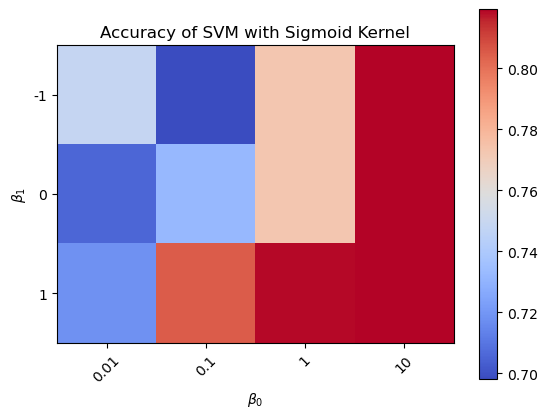

[[0.74849095 0.69818913 0.77263581 0.8194165 ]
 [0.70573441 0.73189135 0.77263581 0.8194165 ]
 [0.71830986 0.80482897 0.81891348 0.8194165 ]]


In [15]:
import matplotlib.pyplot as plt
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create SVM models with different values of C and gamma
coef0s = [-1, 0, 1]
gammas = [0.01, 0.1, 1, 10]
models = []
scores_training=[]
for c in coef0s:
    for gamma in gammas:
        model = SVC(kernel='sigmoid', coef0=c, gamma=gamma, random_state=42)
        model.fit(X_train, y_train)
        score_train = model.score(X_train, y_train)
        scores_training.append(score_train)
        models.append(model)

# Evaluate the models on the testing data
scores_testing = []
for model in models:
    score = model.score(X_test, y_test)
    scores_testing.append(score)
# Plot the scores as a heatmap
scores = np.array(scores_testing).reshape(len(coef0s), len(gammas))
plt.imshow(scores, interpolation='nearest', cmap='coolwarm')
plt.xticks(np.arange(len(gammas)), gammas, rotation=45)
plt.yticks(np.arange(len(coef0s)), coef0s)
plt.xlabel(r'$\beta_0$')
plt.ylabel(r'$\beta_1$')
plt.colorbar()
plt.title('Accuracy of SVM with Sigmoid Kernel')
plt.show()
print(scores)

In [17]:
table_models.loc[3] = ['SVM with kernel: sigmoid', scores_training[-1], scores[-1][-1], 'This model uses a SVM with a sigmoid kernel (beta_0=10 and beta_1=1) and indepent variables as d_age, intelligence_o, funny_o as indepedent variables']

In [18]:
table_models

,Model,Train accuracy,Test accuracy,Observations
0,Logistic Regression,0.825656,0.818353,This model uses a logistic regression using d_...
1,Decision Tree,0.831001,0.821496,This model uses a decision tree with max_depth...
2,Random Forest,0.831001,0.821496,This model uses a random forest with max_depth...
3,SVM with kernel: sigmoid,0.832327,0.819416,This model uses a SVM with a sigmoid kernel (b...
